In [12]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
   -------------------------------------- 258.3/258.3 kB 691.0 kB/s eta 0:00:00
   -------------------------------------- 301.8/301.8 kB 889.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated package


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

TREATED_DATASET = '../dataset/fake_job_word2vec.csv'

In [2]:
import pickle

# Carregar o DataFrame com pickle
with open('../dataset/fake_job_word2vec.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data.salary_max.tail(6)

17874    100000
17875         0
17876         0
17877         0
17878         0
17879         0
Name: salary_max, dtype: int64

In [4]:
colums_to_drop = ['fraudulent']

X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [6]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [7]:
X_test.head()

,telecommuting,has_company_logo,has_questions,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,...,required_education_Vocational - HS Diploma,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector
11088,0,1,1,0,0,0,1,0,0,0,...,0,-0.153630,0.005247,0.000000,-0.080389,0.042993,-0.014129,0.005808,-0.023350,0.000000
10819,0,1,1,0,0,1,0,0,0,0,...,0,-0.032256,0.198084,0.000000,0.024081,0.027376,0.040644,0.073135,0.000000,0.000000
11538,0,1,1,0,0,0,0,1,0,0,...,0,0.094632,0.162803,0.115653,0.013706,0.046053,0.039572,0.101865,0.113106,0.115653
7316,0,0,1,0,0,0,0,1,0,0,...,0,0.070330,0.114728,0.000000,0.000000,-0.107302,-0.000038,0.040943,0.094866,0.000000
8749,0,1,0,0,0,0,0,1,0,0,...,0,-0.105330,-0.021073,0.000000,-0.090977,0.002259,0.007684,0.000000,-0.045178,-0.101499


### Random Forest

In [8]:
rf = RandomForestClassifier().fit(X_train_sm, y_train_sm)

company_profile_vector                  0.016110
has_company_logo                        0.011591
has_questions                           0.007678
industry_vector                         0.005888
function_vector                         0.005685
benefits_vector                         0.005472
required_experience_Mid-Senior level    0.004843
description_vector                      0.003497
department_vector                       0.003141
required_education_Bachelor's Degree    0.003049
dtype: float64


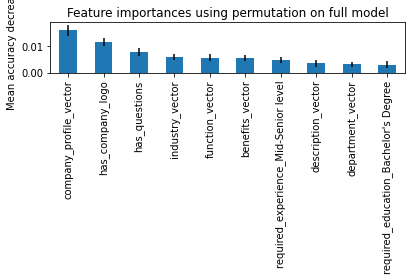

In [31]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

forest_importances_sorted = forest_importances.sort_values(ascending=False)

# Selecionar as 10 features mais importantes
top_10_features = forest_importances_sorted.head(10)
print(top_10_features)
top_10_indices = [X_test.columns.get_loc(col) for col in top_10_features.index]
top_10_std = result.importances_std[top_10_indices]

# Plotar as 10 features mais importantes
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=top_10_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Confusion Matrix

Acurácia dos dados de teste:  0.9749440715883669



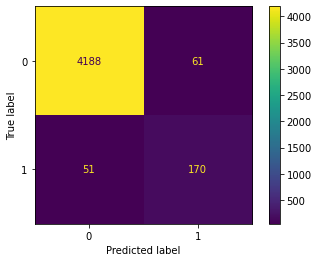

In [9]:
y_pred = rf.predict(X_test)

print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()

plt.show()

## Evaluation Metrics

Precision

In [10]:
precision_score_number = precision_score(Y_test, y_pred)

Recall

In [11]:
recall_score_number = recall_score(Y_test, y_pred)

F1-Score

In [12]:
f1_score_number = f1_score(Y_test, y_pred)

Func for printing all the evaluate metrics

In [13]:
def get_evaluate_metrics():
    print(f'''
        Precision Score of the fake class is: {precision_score_number}
        Recall Score of the fake class is: {recall_score_number}
        F1 Score of the fake class is: {f1_score_number}
    ''')

In [14]:
get_evaluate_metrics()


        Precision Score of the fake class is: 0.7359307359307359
        Recall Score of the fake class is: 0.7692307692307693
        F1 Score of the fake class is: 0.7522123893805309
    


Precision-Recall Curve -> We are dealing with a imbalanced dataset, so the choice for using the Precision-Recall Curve is because it gives more importance to positive class. Thus is helpful for dealing with imbalanced data, which is our case for fake job postings. 

In [15]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
average_precision = average_precision_score(Y_test, y_pred)

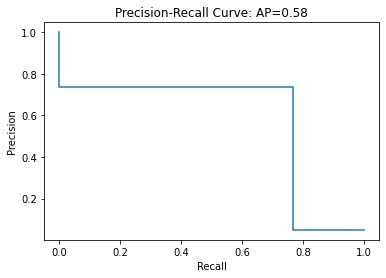

In [16]:
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()

c:\Users\JoaoFelipeMoraisVasc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


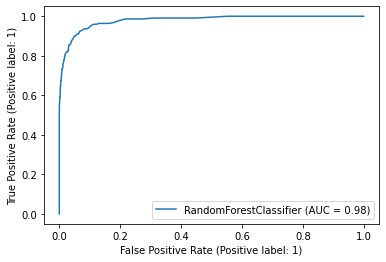

In [17]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plot_roc_curve(rf, X_test, Y_test)

### Final Report of our Model

In [18]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4249
           1       0.74      0.77      0.75       221

    accuracy                           0.97      4470
   macro avg       0.86      0.88      0.87      4470
weighted avg       0.98      0.97      0.98      4470



### Salvando predições

In [21]:
X_test_pred = X_test.copy()  # Faça uma cópia do DataFrame X_test
X_test_pred["predicao"] = y_pred  # Adicione a coluna "predicao" com os valores de y_pred


In [36]:
X_test_pred = X_test_pred[['predicao']]
X_test_pred.head()


,predicao
11088,0
10819,0
11538,1
7316,0
8749,0


In [22]:
X_test_pred

,telecommuting,has_company_logo,has_questions,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,...,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector,predicao
11088,0,1,1,0,0,0,1,0,0,0,...,-0.153630,0.005247,0.000000,-0.080389,0.042993,-0.014129,0.005808,-0.023350,0.000000,0
10819,0,1,1,0,0,1,0,0,0,0,...,-0.032256,0.198084,0.000000,0.024081,0.027376,0.040644,0.073135,0.000000,0.000000,0
11538,0,1,1,0,0,0,0,1,0,0,...,0.094632,0.162803,0.115653,0.013706,0.046053,0.039572,0.101865,0.113106,0.115653,1
7316,0,0,1,0,0,0,0,1,0,0,...,0.070330,0.114728,0.000000,0.000000,-0.107302,-0.000038,0.040943,0.094866,0.000000,0
8749,0,1,0,0,0,0,0,1,0,0,...,-0.105330,-0.021073,0.000000,-0.090977,0.002259,0.007684,0.000000,-0.045178,-0.101499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0,1,0,0,0,0,0,1,0,0,...,0.022277,0.179835,0.000000,-0.104542,-0.013960,0.000000,0.000000,-0.209112,0.131404,0
520,0,1,0,0,0,0,0,1,0,0,...,-0.028537,0.156906,0.000000,0.009124,0.016174,0.005176,0.090471,-0.084057,0.017828,0
9483,0,1,1,0,0,1,0,0,0,0,...,0.066134,0.006202,0.000000,0.021286,0.024305,0.000000,0.000000,0.000000,0.000000,0
13841,0,1,1,0,0,0,0,0,0,1,...,0.044530,-0.003926,0.000000,-0.056006,0.022386,0.000000,0.097999,-0.115658,-0.178535,0


In [37]:
data_pred = data.merge(X_test_pred, left_index=True, right_index=True, how='left')

In [40]:
X_test_pred.iloc[3]

predicao    0
Name: 7316, dtype: int64

In [38]:
data_pred.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector,predicao
0,0,1,0,0,0,0,0,0,0,1,...,0.247668,0.115215,0.244362,-0.009132,0.035534,0.031247,0.000000,0.000000,0.244362,NaN
1,0,1,0,0,0,0,0,0,1,0,...,-0.060168,0.102202,0.254773,-0.012521,0.004112,0.006893,0.013835,0.113106,-0.101499,NaN
2,0,1,0,0,0,0,1,0,0,0,...,0.069010,0.002190,0.000000,-0.023828,0.008513,-0.020861,0.000000,0.000000,0.000000,NaN
3,0,1,0,0,0,0,0,0,1,0,...,0.048156,0.061260,0.092472,0.000941,0.023731,0.036613,0.038574,-0.072177,0.092472,0.0
4,0,1,1,0,0,0,0,0,1,0,...,0.002881,0.038611,0.000000,-0.024219,-0.018626,0.028890,0.016103,-0.115658,-0.178535,NaN


In [43]:
data_filtrado = data_pred.dropna(subset=['predicao'])

In [46]:
import pickle
with open('../resultados/predicoes_rf.pkl', 'wb') as f:
    pickle.dump(data_filtrado, f)

data_filtrado.to_csv('../resultados/predicoes_rf.csv')